## Статистичний аналіз даних

### Завдання

Використовуючи датасет з файлу train.csv, побудуйте діаграми розподілу для значень з поля «Age».

Заповніть пропущені значення в датасеті з файлу train.csv.

Обґрунтуйте вибір способу заповнення пропущених значень.

### Розв'язок

In [300]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

from fitter import Fitter, get_common_distributions, get_distributions

import warnings
warnings.filterwarnings("ignore")

### Завантаження набору даних

In [301]:
data = pd.read_csv('train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Побудова гістограми

Text(0.5, 1.0, 'Діаграма розподілу змінної "Age"')

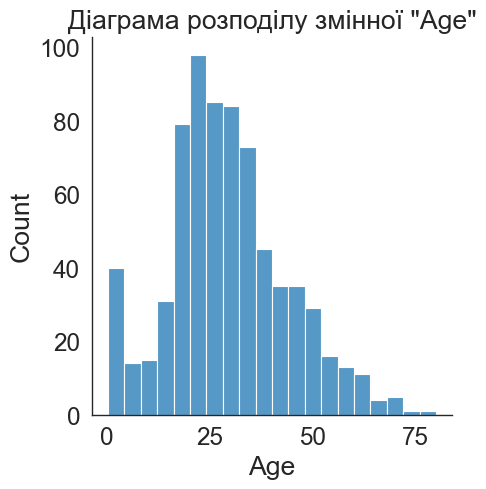

In [302]:
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=data, x="Age", kind="hist", bins = 20, aspect = 1)
plt.title('Діаграма розподілу змінної "Age"')

### Підбір розподілів

Fitting 10 distributions: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  7.79it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
lognorm,0.011183,997.757182,-7880.130272,inf,0.056286,0.020855
chi2,0.011215,998.614796,-7878.095589,inf,0.057456,0.017226
gamma,0.011215,998.614708,-7878.095568,inf,0.057456,0.017226
norm,0.011571,1025.691264,-7862.395007,inf,0.064561,0.004963
cauchy,0.011777,1027.107508,-7849.745954,inf,0.091760,0.000011


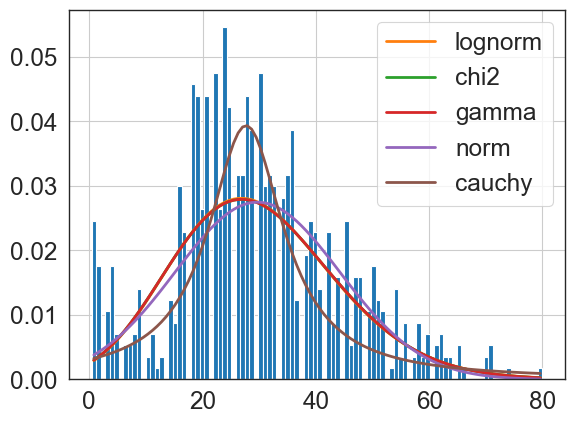

In [303]:
ft = Fitter(age_clear, distributions = get_common_distributions())
ft.fit()
ft.summary()

### Визначення найкращого розподілу

In [304]:
f.get_best(method = 'sumsquare_error')

{'lognorm': {'s': 0.13424431904602424,
  'loc': -78.02671169181616,
  'scale': 106.78081758772217}}

**На основі значення sumsquare_error найкращим розподілом для даних Age є логарифмічно-нормальний розподіл.**

---

### Заповнення пропущених значень

**Визначимо пропущені значення**

In [305]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [306]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [307]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [308]:
new_data = data[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]

In [309]:
new_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


**Пропущені дані в полі "Age" заповнюємо середнім значенням, оскільки дані в цьому полі належать до числового типу і не категоризовані.**

In [310]:
new_data['Age'].fillna(clean_data['Age'].mean(), inplace = True)
new_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


**Пропуски даних в полі "Cabin" позначаємо 0, наявність даних - 1, і передаємо результат в поле 'Cabin_new'**

In [311]:
new_data['Cabin_new'] = np.where(data['Cabin'].isnull(), 0, 1)

**Пропущені дані з в полі "Embarked" заповнюємо модою, оскільки дані в цьому полі належать до категоріальної дискретної характеристики.**

In [312]:
new_data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [313]:
new_data['Embarked'].replace(np.nan, 'S', inplace = True)

new_data['Embarked'].fillna('S')
conditions = [data['Embarked'] == 'S', data['Embarked'] == 'C', data['Embarked'] == 'Q']
choices = [0, 1, 2]
new_data['Embarked'] = np.select(conditions, choices, default= 0)

In [314]:
new_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_new
0,0,3,male,22.000000,1,0,7.2500,0,0
1,1,1,female,38.000000,1,0,71.2833,1,1
2,1,3,female,26.000000,0,0,7.9250,0,0
3,1,1,female,35.000000,1,0,53.1000,0,1
4,0,3,male,35.000000,0,0,8.0500,0,0
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,0,0
887,1,1,female,19.000000,0,0,30.0000,0,1
888,0,3,female,29.699118,1,2,23.4500,0,0
889,1,1,male,26.000000,0,0,30.0000,1,1


In [315]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    int64  
 1   Pclass     891 non-null    int64  
 2   Sex        891 non-null    object 
 3   Age        891 non-null    float64
 4   SibSp      891 non-null    int64  
 5   Parch      891 non-null    int64  
 6   Fare       891 non-null    float64
 7   Embarked   891 non-null    int32  
 8   Cabin_new  891 non-null    int32  
dtypes: float64(2), int32(2), int64(4), object(1)
memory usage: 55.8+ KB


In [316]:
clean_data['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64